In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
ds_total_x=pd.read_csv('net_dataset_x.csv')
ds_total_y=pd.read_csv('net_dataset_y.csv')

In [3]:

ds_total_x=ds_total_x.drop('Unnamed: 0',axis=1)
ds_total_y=ds_total_y.drop('Unnamed: 0',axis=1)

In [4]:

total_x=ds_total_x.to_numpy(dtype='float32')
total_y=ds_total_y.to_numpy(dtype='float32')
     

In [5]:
train_x,test_x,train_y,test_y=train_test_split(total_x,total_y,test_size=0.15,random_state=False)


In [6]:

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [7]:
num_classes = len(np.unique(train_y))

In [8]:
print(num_classes)


31


In [10]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    conv4 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)

    conv5 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.ReLU()(conv5)

    conv6 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv5)
    conv6 = keras.layers.BatchNormalization()(conv6)
    conv6 = keras.layers.ReLU()(conv6)

    conv7 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv6)
    conv7 = keras.layers.BatchNormalization()(conv7)
    conv7 = keras.layers.ReLU()(conv7)

    # conv8 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv7)
    # conv8 = keras.layers.BatchNormalization()(conv8)
    # conv8 = keras.layers.ReLU()(conv8)

    # conv9 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv8)
    # conv9 = keras.layers.BatchNormalization()(conv9)
    # conv9 = keras.layers.ReLU()(conv9)

    gap = keras.layers.GlobalAveragePooling1D()(conv7)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=train_x.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)
     


In [11]:
epochs = 180
batch_size = 64

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/180
3083/3083 [==============================] - 28s 9ms/step - loss: 0.9616 - sparse_categorical_accuracy: 0.6306 - val_loss: 1.5438 - val_sparse_categorical_accuracy: 0.4427
Epoch 2/180
3083/3083 [==============================] - 30s 10ms/step - loss: 0.6893 - sparse_categorical_accuracy: 0.7202 - val_loss: 0.9242 - val_sparse_categorical_accuracy: 0.6694
Epoch 3/180
3083/3083 [==============================] - 31s 10ms/step - loss: 0.6152 - sparse_categorical_accuracy: 0.7481 - val_loss: 0.6261 - val_sparse_categorical_accuracy: 0.7342
Epoch 4/180
3083/3083 [==============================] - 33s 11ms/step - loss: 0.5668 - sparse_categorical_accuracy: 0.7663 - val_loss: 0.5199 - val_sparse_categorical_accuracy: 0.7883
Epoch 5/180
3083/3083 [==============================] - 31s 10ms/step - loss: 0.5352 - sparse_categorical_accuracy: 0.7791 - val_loss: 0.5555 - val_sparse_categorical_accuracy: 0.7567
Epoch 6/180
3083/3083 [==============================] - 32s 10ms/step - los

3083/3083 [==============================] - 36s 12ms/step - loss: 0.3644 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.3947 - val_sparse_categorical_accuracy: 0.8339
Epoch 46/180
3083/3083 [==============================] - 35s 11ms/step - loss: 0.3635 - sparse_categorical_accuracy: 0.8492 - val_loss: 0.3577 - val_sparse_categorical_accuracy: 0.8496
Epoch 47/180
3083/3083 [==============================] - 35s 11ms/step - loss: 0.3615 - sparse_categorical_accuracy: 0.8512 - val_loss: 0.4532 - val_sparse_categorical_accuracy: 0.8145
Epoch 48/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3594 - sparse_categorical_accuracy: 0.8516 - val_loss: 0.3415 - val_sparse_categorical_accuracy: 0.8598
Epoch 49/180
3083/3083 [==============================] - 37s 12ms/step - loss: 0.3596 - sparse_categorical_accuracy: 0.8520 - val_loss: 0.4626 - val_sparse_categorical_accuracy: 0.8166
Epoch 50/180
3083/3083 [==============================] - 46s 15ms/step - loss: 0.3

3083/3083 [==============================] - 38s 12ms/step - loss: 0.3348 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.4300 - val_sparse_categorical_accuracy: 0.8283
Epoch 90/180
3083/3083 [==============================] - 33s 11ms/step - loss: 0.3371 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.3227 - val_sparse_categorical_accuracy: 0.8659
Epoch 91/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3345 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3364 - val_sparse_categorical_accuracy: 0.8636
Epoch 92/180
3083/3083 [==============================] - 37s 12ms/step - loss: 0.3353 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.3459 - val_sparse_categorical_accuracy: 0.8587
Epoch 93/180
3083/3083 [==============================] - 37s 12ms/step - loss: 0.3345 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.8620
Epoch 94/180
3083/3083 [==============================] - 39s 13ms/step - loss: 0.3

Epoch 133/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3014 - sparse_categorical_accuracy: 0.8756 - val_loss: 0.3251 - val_sparse_categorical_accuracy: 0.8660
Epoch 134/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3011 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.2965 - val_sparse_categorical_accuracy: 0.8795
Epoch 135/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3020 - sparse_categorical_accuracy: 0.8752 - val_loss: 0.3368 - val_sparse_categorical_accuracy: 0.8688
Epoch 136/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3012 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.3098 - val_sparse_categorical_accuracy: 0.8759
Epoch 137/180
3083/3083 [==============================] - 34s 11ms/step - loss: 0.3011 - sparse_categorical_accuracy: 0.8755 - val_loss: 0.2889 - val_sparse_categorical_accuracy: 0.8829
Epoch 138/180
3083/3083 [==============================] - 34s 11

Epoch 177/180
3083/3083 [==============================] - 31s 10ms/step - loss: 0.2790 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.2783 - val_sparse_categorical_accuracy: 0.8869
Epoch 178/180
3083/3083 [==============================] - 32s 10ms/step - loss: 0.2787 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.2767 - val_sparse_categorical_accuracy: 0.8877
Epoch 179/180
3083/3083 [==============================] - 31s 10ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.2832 - val_sparse_categorical_accuracy: 0.8860
Epoch 180/180
3083/3083 [==============================] - 32s 10ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.8858 - val_loss: 0.2787 - val_sparse_categorical_accuracy: 0.8879


In [12]:
test_loss, test_acc = model.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)
     

1360/1360 [==============================] - 3s 2ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.8861
Test accuracy 0.8861463665962219
Test loss 0.2785540521144867


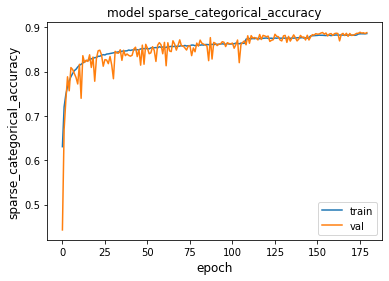

In [13]:

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

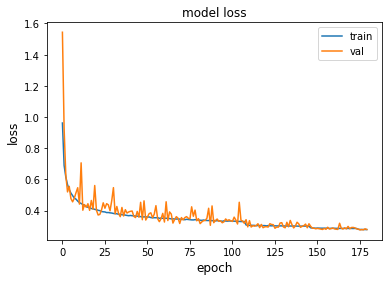

In [14]:
metric1 = "loss"
plt.figure()
plt.plot(history.history[metric1])
plt.plot(history.history["val_" + metric1])
plt.title("model " + metric1)
plt.ylabel(metric1, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [15]:
y_pred=model.predict(test_x)
res=[]
for i in y_pred:
  res.append(np.argmax(i))
print(res)
     

[11, 6, 7, 24, 4, 12, 8, 18, 14, 15, 14, 5, 16, 18, 13, 16, 18, 27, 5, 15, 6, 7, 26, 18, 28, 26, 30, 11, 11, 25, 11, 30, 18, 11, 29, 18, 7, 8, 15, 11, 28, 12, 30, 13, 12, 11, 13, 18, 27, 11, 26, 13, 30, 17, 25, 25, 16, 13, 13, 29, 15, 26, 20, 22, 16, 16, 28, 25, 6, 21, 27, 6, 7, 17, 16, 13, 24, 26, 18, 14, 14, 9, 16, 18, 6, 12, 29, 25, 13, 28, 7, 22, 14, 30, 6, 13, 30, 15, 26, 20, 18, 12, 7, 11, 12, 30, 28, 25, 29, 6, 22, 18, 23, 26, 26, 29, 18, 25, 7, 7, 30, 16, 6, 14, 12, 28, 25, 17, 13, 6, 29, 6, 16, 4, 12, 11, 25, 6, 26, 9, 3, 30, 25, 25, 30, 13, 29, 6, 28, 17, 24, 6, 14, 17, 12, 16, 30, 25, 29, 29, 25, 20, 6, 17, 10, 25, 27, 26, 25, 3, 30, 14, 30, 26, 26, 30, 18, 26, 18, 13, 25, 17, 6, 18, 14, 26, 28, 14, 12, 30, 11, 21, 16, 17, 9, 18, 6, 26, 18, 17, 6, 12, 11, 13, 23, 13, 29, 30, 16, 7, 18, 24, 7, 28, 25, 24, 17, 23, 26, 7, 10, 29, 14, 25, 25, 18, 12, 6, 6, 18, 17, 17, 28, 14, 6, 29, 22, 26, 30, 14, 28, 14, 21, 11, 15, 4, 11, 25, 20, 11, 6, 30, 14, 25, 24, 12, 26, 4, 13, 30, 25, 

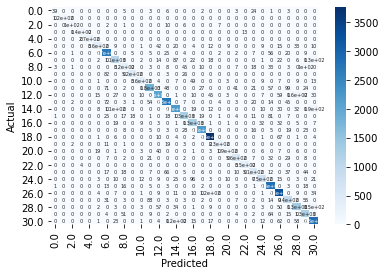

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(test_y, res)
df_cm = pd.DataFrame(data, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 5})# font size

In [17]:

confusion_mat=np.array(data)
as1=pd.DataFrame(confusion_mat)
as1.to_excel('c_mat_local_9a.xlsx')